# Linear Regression  
supervised learning: simple linear regression

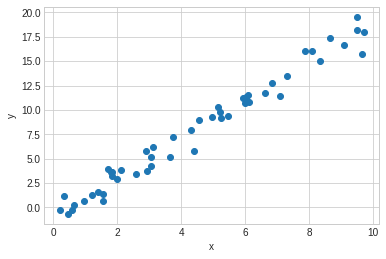

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

# create random data
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## choose a class of model

In [2]:
from sklearn.linear_model import LinearRegression

## choose model hyperparameters

In [3]:
model = LinearRegression(fit_intercept=True)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


## arrange data into a features matrix and target vector

In [4]:
X = x[:, np.newaxis]
print(X.shape)

(50, 1)


In [5]:
print X[:10]

[[ 3.74540119]
 [ 9.50714306]
 [ 7.31993942]
 [ 5.98658484]
 [ 1.5601864 ]
 [ 1.5599452 ]
 [ 0.58083612]
 [ 8.66176146]
 [ 6.01115012]
 [ 7.08072578]]


## fit the model to your data

In [6]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'decision_function',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'residues_',
 'score',
 'set_params',
 'singular_']

## hyperparameters

These two parameters represent the __slope__ and __intercept__ of the simple linear fit to the data

In [8]:
model.coef_

array([ 1.9776566])

In [9]:
model.intercept_

-0.90331072553111458

## predit labels for unknown data

In [10]:
xfit = np.linspace(-1, 11)

# Xfit = unknown data
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

In [11]:
print(Xfit.shape)
print(Xfit[:10])

(50, 1)
[[-1.        ]
 [-0.75510204]
 [-0.51020408]
 [-0.26530612]
 [-0.02040816]
 [ 0.2244898 ]
 [ 0.46938776]
 [ 0.71428571]
 [ 0.95918367]
 [ 1.20408163]]


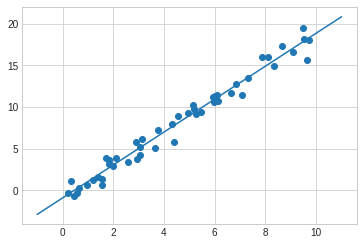

In [12]:
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

## Example: Diabetes dataset

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [15]:
print("shape of the dataset", diabetes.data.shape)

('shape of the dataset', (442, 10))


In [16]:
diabetes.data[0:5,0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485]])

In [17]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]  # coloumn 2

In [18]:
diabetes_X[:10]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215]])

In [19]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [20]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [21]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

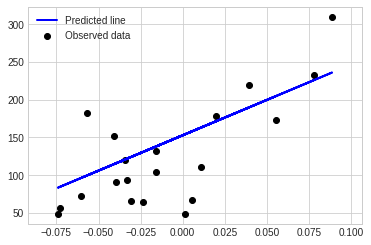

In [23]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=2)
plt.legend(['Predicted line', 'Observed data'])

#plt.xticks(())
#plt.yticks(())

plt.show()

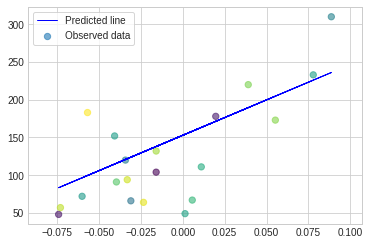

In [24]:
rng = np.random.RandomState(0)
colors = rng.rand(20)

fig = plt.figure()
plt.scatter(diabetes_X_test, diabetes_y_test,  c=colors, s=40, alpha=0.6, cmap='viridis')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=1)
plt.legend(['Predicted line', 'Observed data'], frameon=True, loc='upper left')

plt.show()

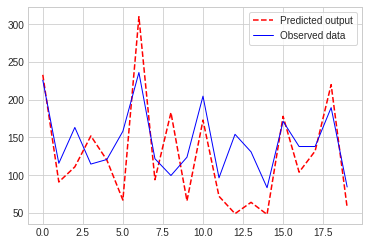

In [25]:
plt.plot(diabetes_y_test, '--r')
plt.plot(diabetes_y_pred, '-b', linewidth=1)
plt.legend(['Predicted output', 'Observed data'], frameon=True, loc='upper right')

plt.show()

In [34]:
diabetes_y_test[0:10]

array([ 233.,   91.,  111.,  152.,  120.,   67.,  310.,   94.,  183.,   66.])

In [26]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

('Coefficients: \n', array([ 938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47
